# <span style='color:cyan'> House Prices EDA </span>

Kaggle | House Prices - Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### <span style='color:lightblue'> Import libraries and read the house prices Dataset </span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv") # read training data.
test = pd.read_csv("test.csv") # read test data.

In [3]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

### <span style='color:cyan'> Perform Exploratory Data Analysis </span>

In [4]:
train.shape # shape of training.

(1460, 80)

In [5]:
train.head() # head of training.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.describe().T # Description of the dataset

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
train.info() # information about the training data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
train.dtypes.value_counts() # data types of the training dataset.

object     43
int64      34
float64     3
dtype: int64

In [9]:
# Sort the train data attributes to quantitative and qualitative categories.
quantitative_cols = []
qualitative_cols = []
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
            quantitative_cols.append(col)
    else:
        qualitative_cols.append(col)

print("Qualitative Columns: ")
print(qualitative_cols)

print("Quantitative Columns: ")
print(quantitative_cols)

Qualitative Columns: 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Quantitative Columns: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gara

#### <span style='color:lightblue'> Missing Train values </span>

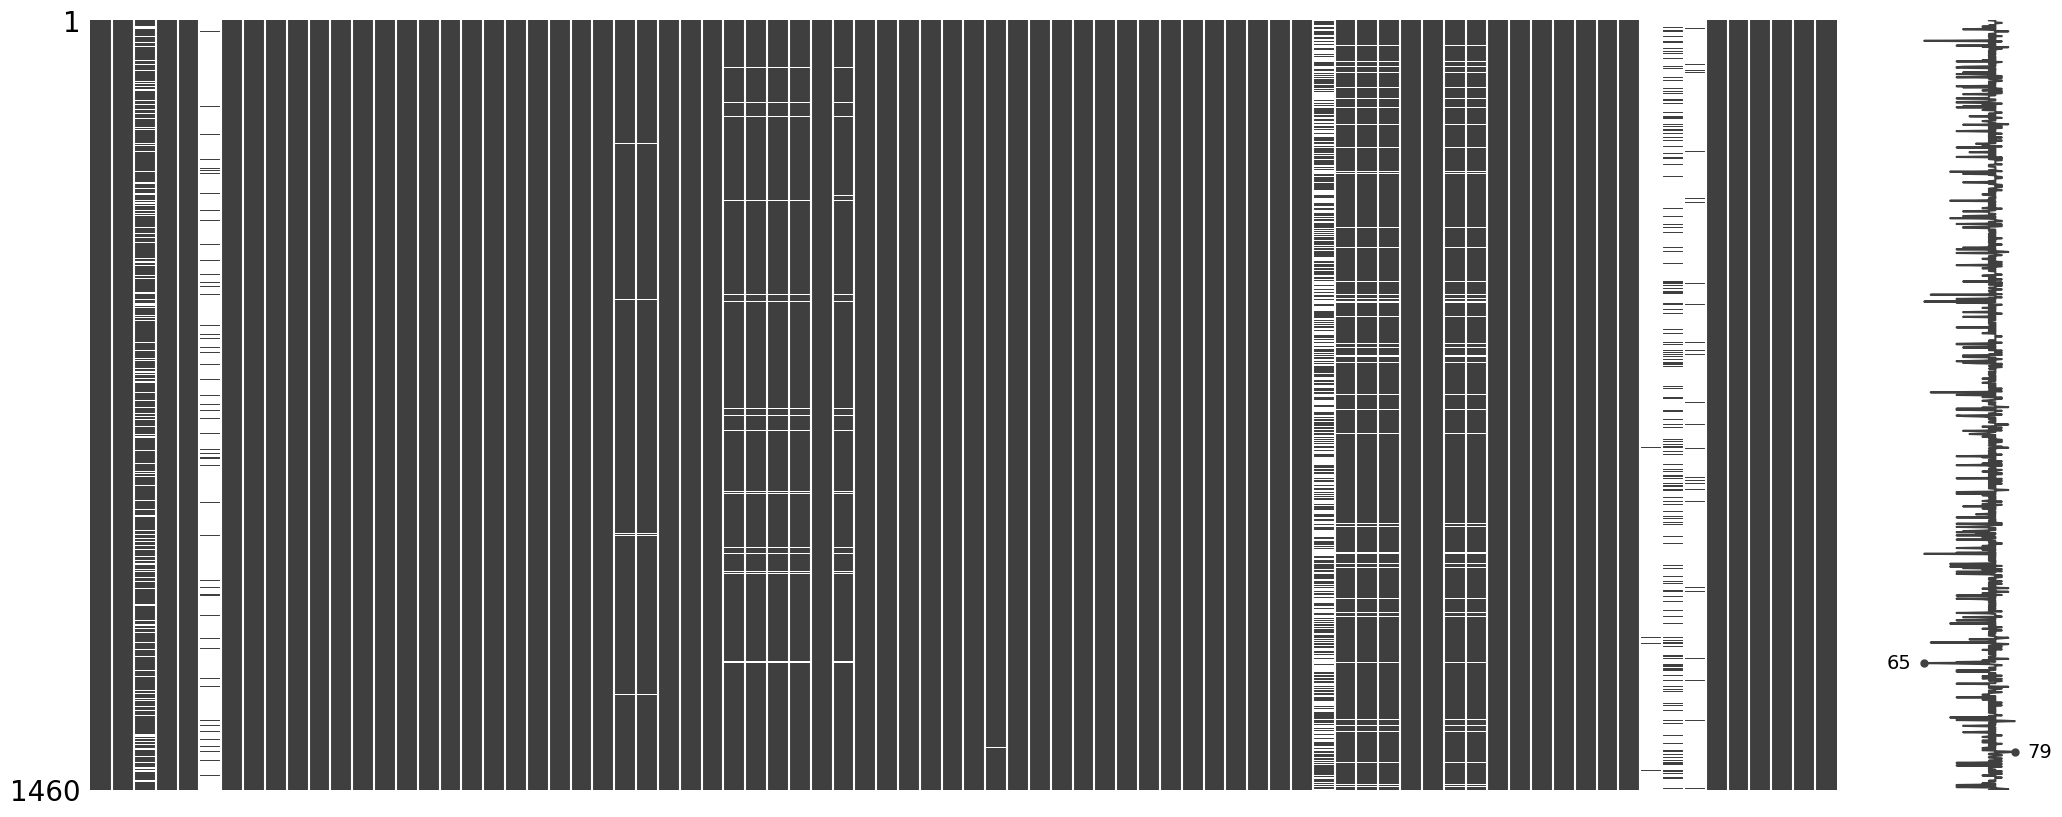

In [10]:
msno.matrix(train); # plot the missing values using msno.

In [11]:
# print the percentage of missing values for instances.
total = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum().sort_values(ascending = False) != 0]
percent = ((train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)[(train.isnull().sum() / train.isnull().count()).sort_values(ascending = False) != 0])
missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing)

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685


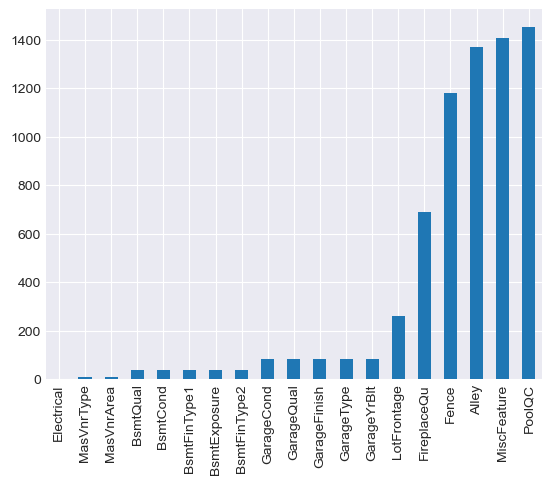

In [12]:
# Plot the most null columns.
missing = train.isnull().sum()
missing = missing[missing > 0]
style.use('seaborn-darkgrid')
missing.sort_values(inplace=True)
missing.plot.bar();

Missing values exist in 19 attributes, accounting for more than half of all data. Most of the time, NA denotes a lack of a subject described by an attribute, such as a missing pool, fence, garage, or basement.

#### <span style="color:lightblue"> Data redundancy </span>

In [13]:
# Check for duplicates across all columns
duplicated = train.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
print(train[duplicated])


Number of duplicated instances: 0
Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: [

#### <span style='color:lightblue'> Correlation </span>

In [14]:
correlation = train.corr() #find the correlation
print(correlation)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

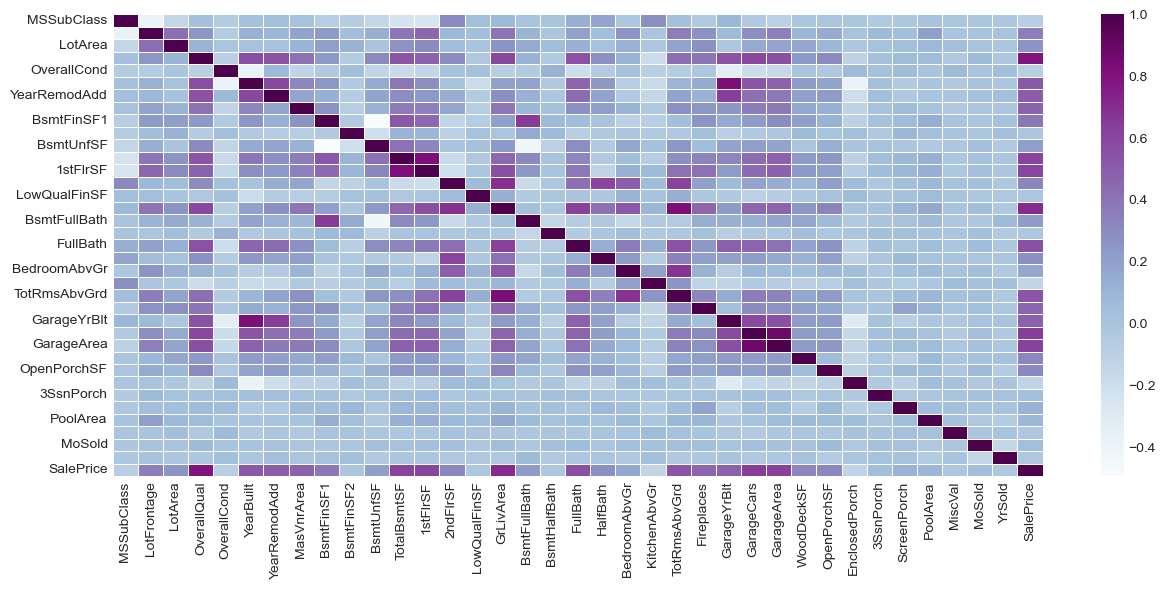

In [15]:
plt.figure(figsize=(15,6)) #plot the heatmap for the correlation
sns.heatmap(correlation,fmt=".5f", linewidth=.5, cmap="BuPu") 
plt.show() #the more darker color the more stronger correlation.

#### <span style='color:lightblue'> Plot relationship between variables </span>

In [16]:
def customized_scatterplot(y, x): # customized scatterplot design.
    style.use('seaborn-darkgrid')
    plt.subplots(figsize = (12, 8))
    sns.scatterplot(y = y, x = x)

The response variable: SalePrice

As you can see, the sale prices are right skewed. This was expected as few people can afford very expensive houses.

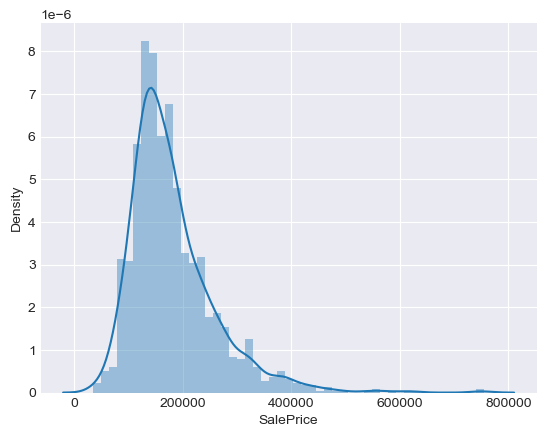

In [17]:
sns.distplot(train['SalePrice']);

SalePrice vs OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

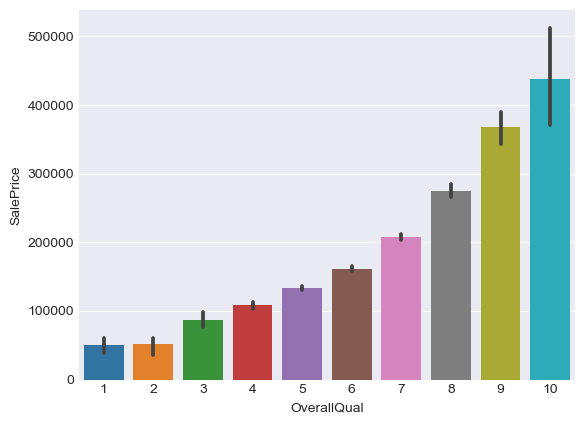

In [18]:
# Sale Price vs Rates the overall material and finish of the house
sns.barplot(train.OverallQual, train.SalePrice)

SalePrice vs OverallCond

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

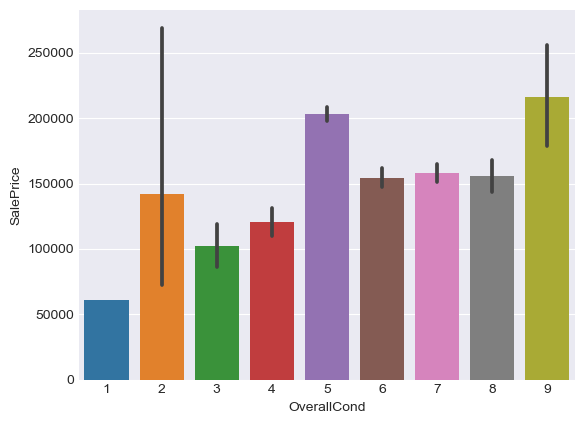

In [19]:
# Sale Price vs Rates the overall condition of the house.
sns.barplot(train.OverallCond, train.SalePrice)

SalePrice vs GrLivArea

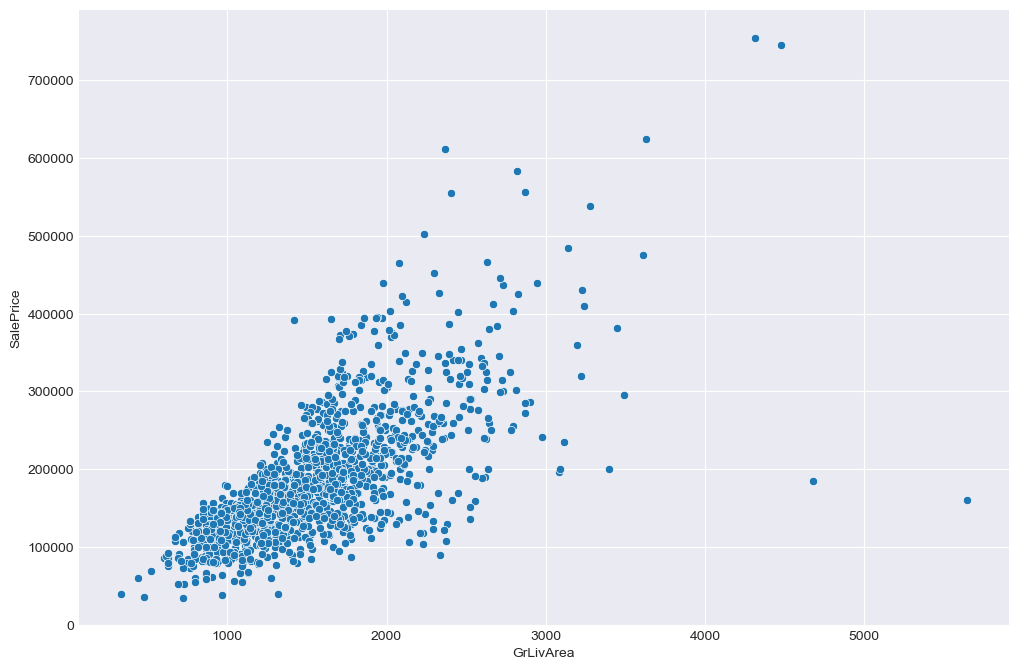

In [20]:
# Sale Price vs Above grade (ground) living area square feet.
customized_scatterplot(train.SalePrice, train.GrLivArea)

SalePrice vs GarageArea

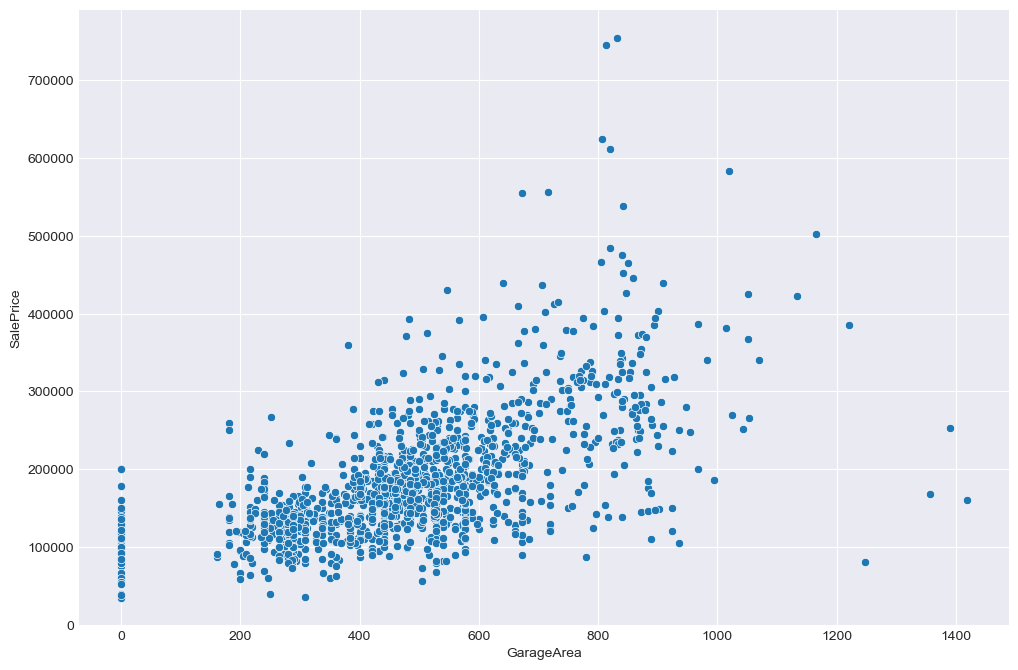

In [21]:
# Sale Price vs Size of garage in square feet.
customized_scatterplot(train.SalePrice, train.GarageArea)

SalePrice vs TotalBsmtSF

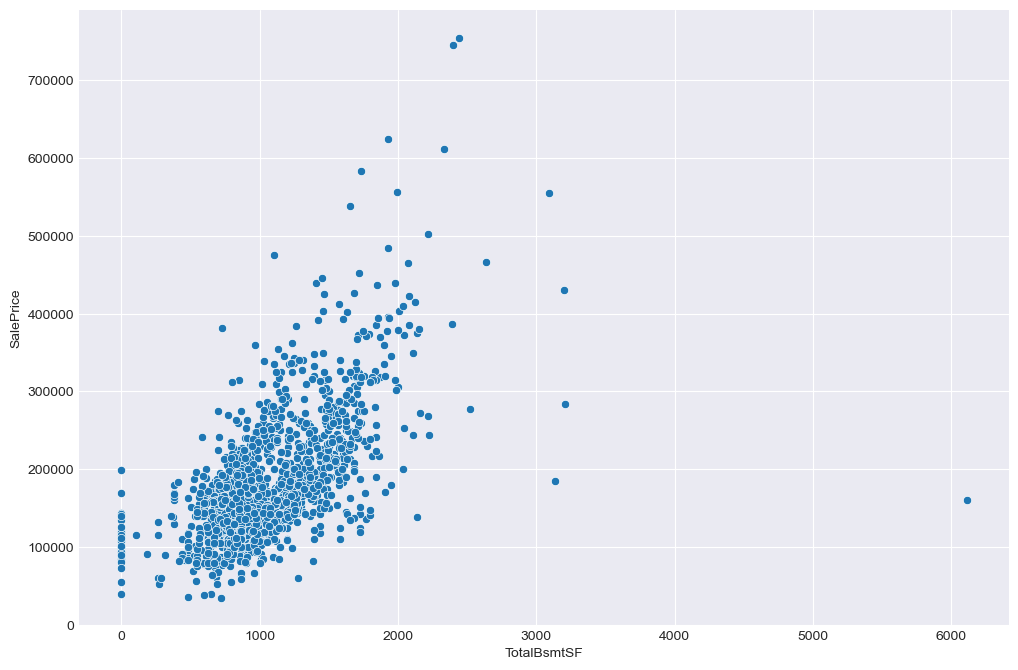

In [22]:
# Sale Price vs Total square feet of basement area.
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

SalePrice vs MasVnrArea

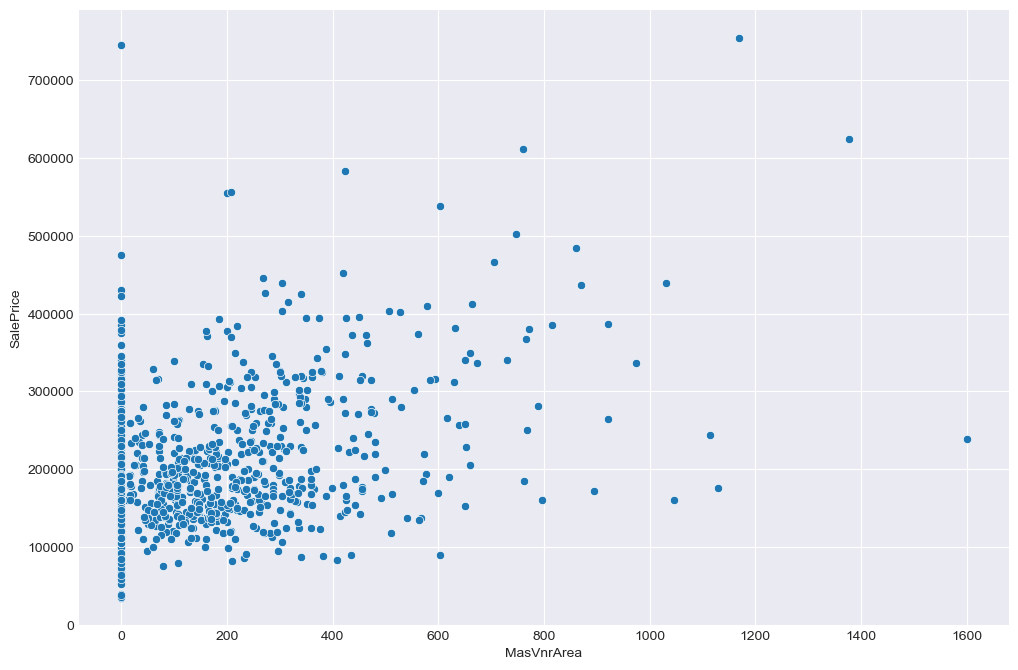

In [23]:
# Sale Price vs Masonry veneer area in square feet.
customized_scatterplot(train.SalePrice, train.MasVnrArea)

## <span style='color:cyan'> Conclusion </span>

In conclusion, the house price dataset contains a comprehensive set of 79 explanatory variables that describe various aspects of residential homes in Ames, Iowa. Through the use of exploratory data analysis (EDA) techniques such as general data analysis, missing values analysis, data redundancy analysis, and correlation analysis, I gained a better understanding of the dataset. The data consists of 1460 instances with 81 features. I also performed data description analysis, which provided information such as the mean and standard deviation of the dataset. The majority of the columns in the dataset were object and int64 types, with a few float64 types. By using the missingno library, I plotted the percentage of missing values in the dataset and identified the top three attributes with missing values (PoolQC, MiscFeature, and Alley). Data redundancy was not observed in the dataset, as all instances were unique. Through the use of a heat map for correlation analysis, I identified several variables that had a significant positive relationship with SalePrice, such as OverallQual, GrLivArea, and TotalBsmtSF. For further details on the instances,  [Data description](./data_description.txt).